In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


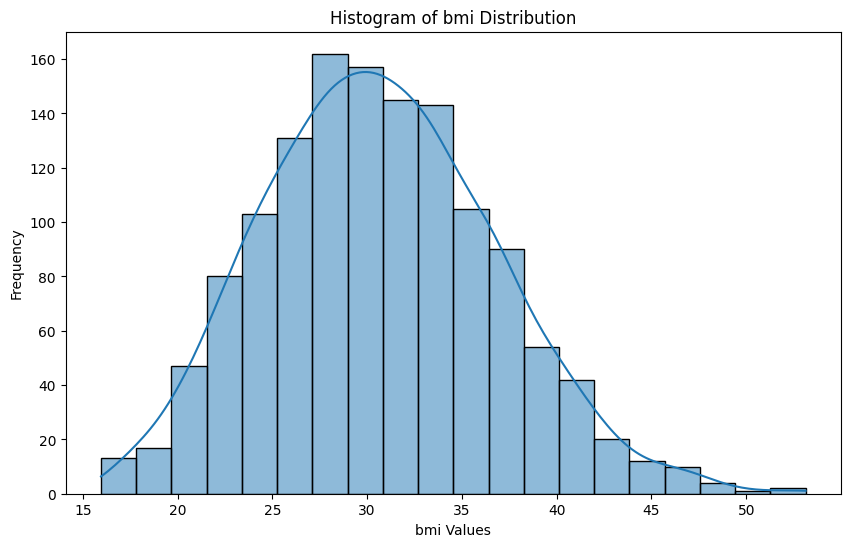

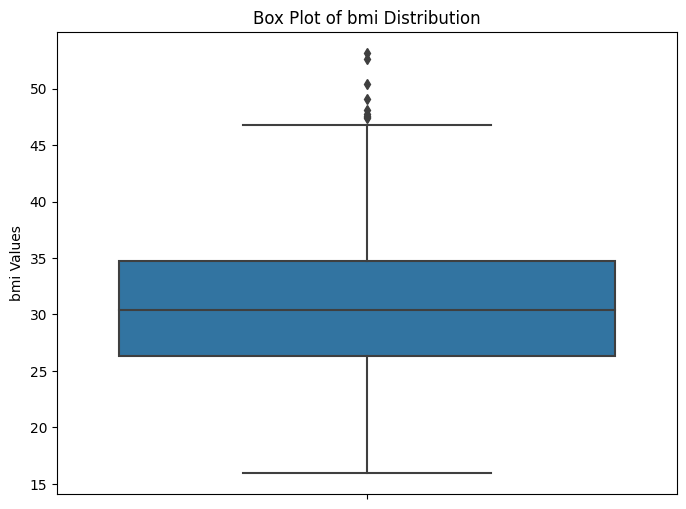

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy



# Step 1: Calculate Descriptive Statistics
descriptive_stats = df['bmi'].describe()
print(descriptive_stats)

# Step 2: Create a Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', bins=20, kde=True)
plt.title('Histogram of bmi Distribution')
plt.xlabel('bmi Values')
plt.ylabel('Frequency')
plt.show()

# Step 3: Generate a Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='bmi')
plt.title('Box Plot of bmi Distribution')
plt.ylabel('bmi Values')
plt.show()




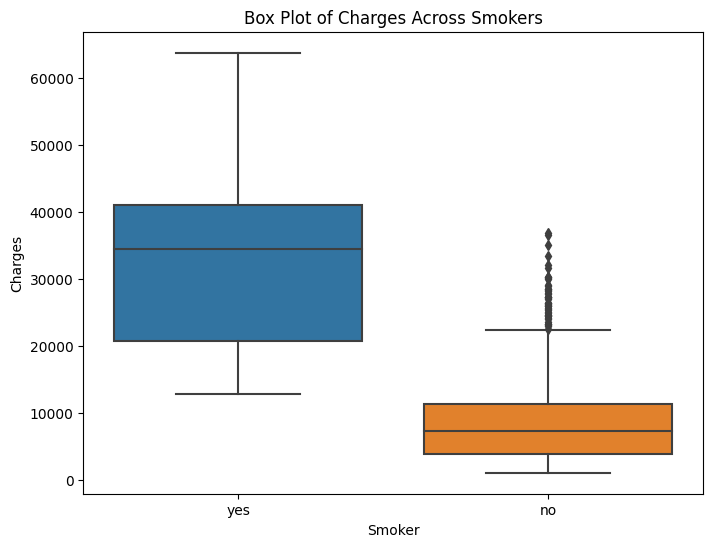

In [ ]:


plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Box Plot of Charges Across Smokers')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()



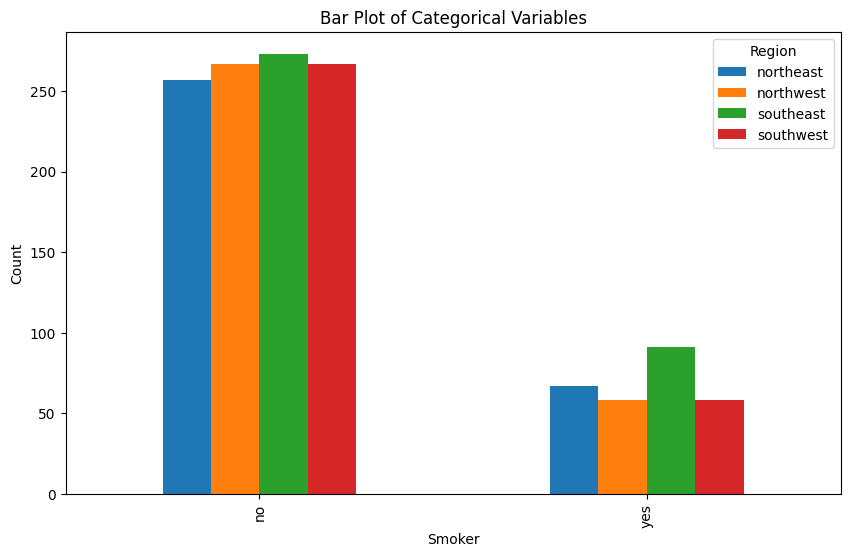

In [ ]:

# Create a crosstabulation (contingency table)
cross_tab = pd.crosstab(df['smoker'], df['region'])

# Create a bar plot
cross_tab.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Bar Plot of Categorical Variables')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.legend(title='Region')
plt.show()


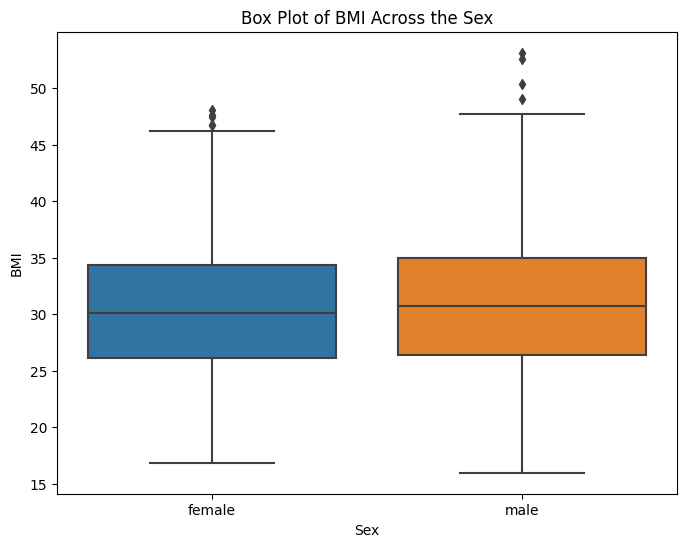

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='bmi')
plt.title('Box Plot of BMI Across the Sex')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

region    northeast  northwest  southeast  southwest
children                                            
0               147        132        157        138
1                77         74         95         78
2                51         66         66         57
3                39         46         35         37
4                 7          6          5          7
5                 3          1          6          8
region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64


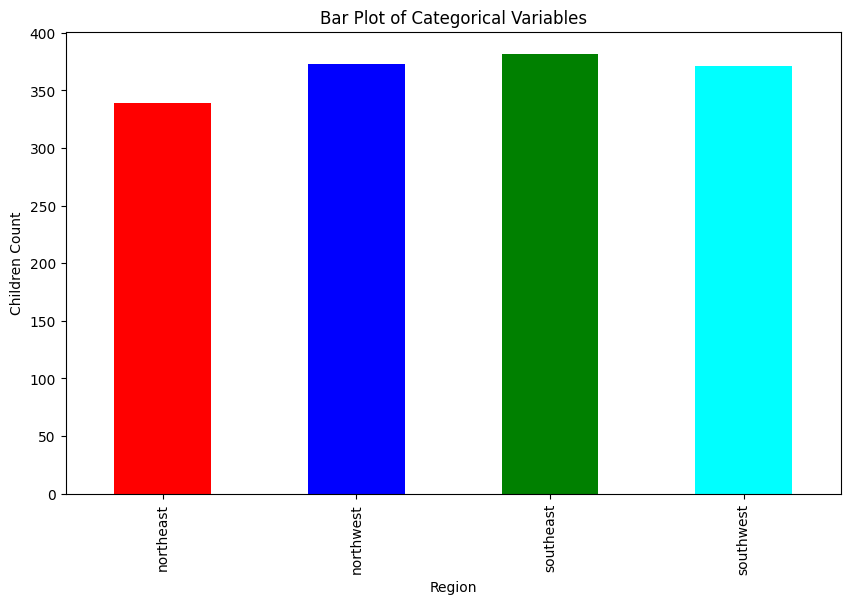

In [ ]:
# Create a crosstabulation (contingency table)
cross_tab = pd.crosstab(df['children'], df['region'])
print(cross_tab)
x = df.groupby("region")["children"].sum()
print(x)
# Create a bar plot
x.plot(kind='bar', stacked=False, figsize=(10, 6), color = ["red", "blue", "green", "cyan"])
plt.title('Bar Plot of Categorical Variables')
plt.xlabel('Region')
plt.ylabel('Children Count')
plt.show()

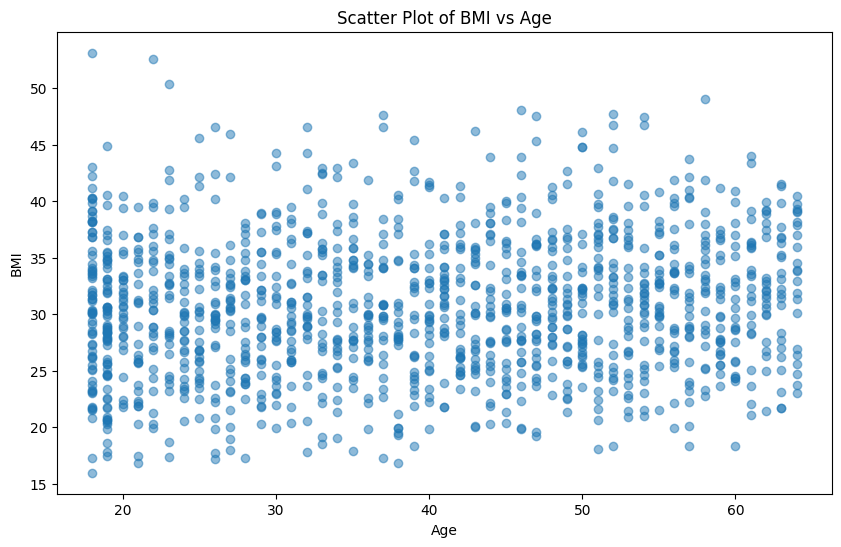

Correlation between Age and BMI: 0.11


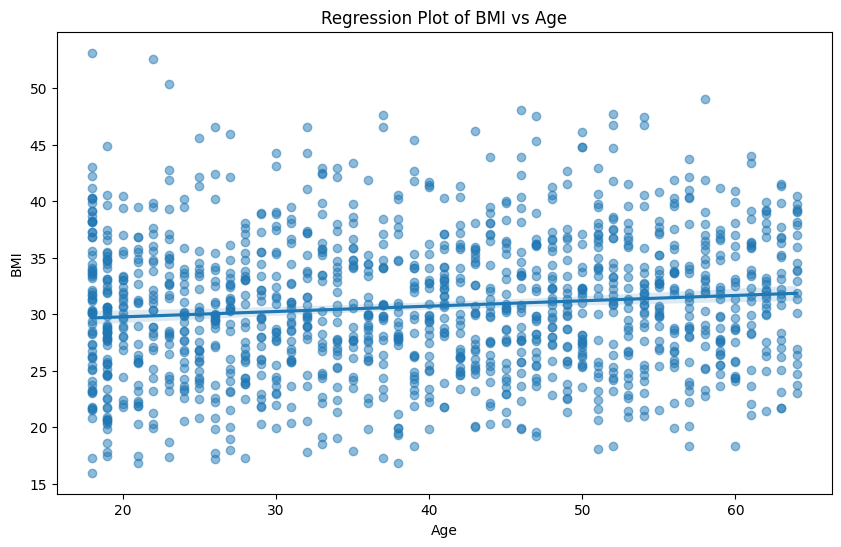

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['bmi'], alpha=0.5)
plt.title('Scatter Plot of BMI vs Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


correlation = df['age'].corr(df['bmi'])
print(f'Correlation between Age and BMI: {correlation:.2f}')


plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='bmi', data=df, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of BMI vs Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


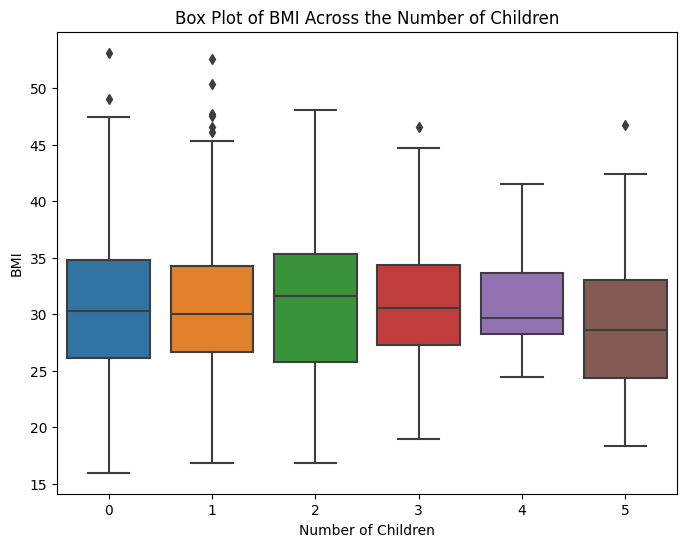

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='bmi', x='children')
plt.title('Box Plot of BMI Across the Number of Children')
plt.ylabel('BMI')
plt.xlabel('Number of Children')
plt.show()

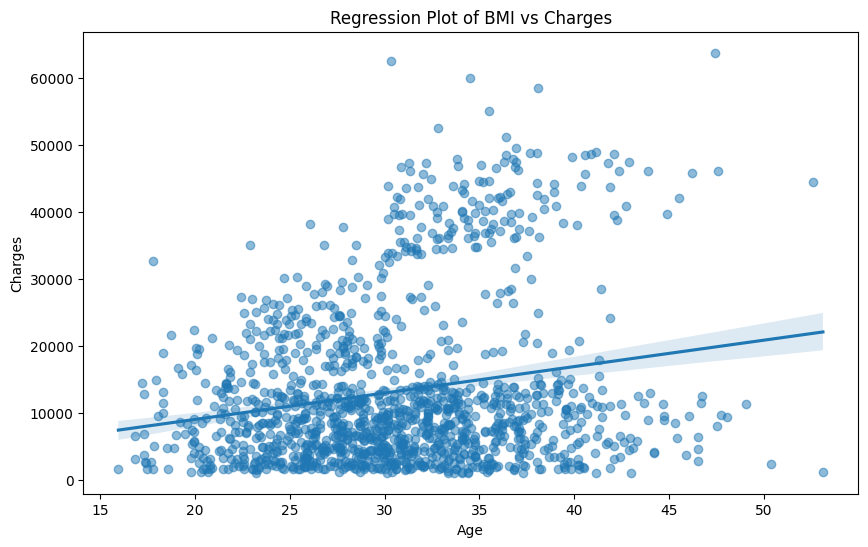

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(y='charges', x='bmi', data=df, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of BMI vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

<Figure size 1200x800 with 0 Axes>

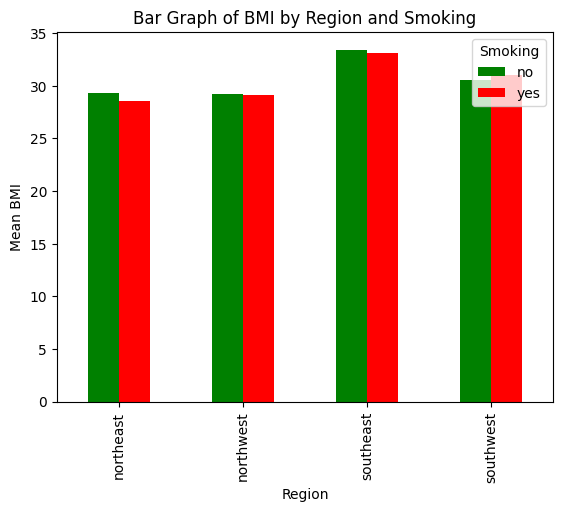

In [ ]:

import numpy as np
plt.figure(figsize=(12, 8))
table = pd.pivot_table(df, values='bmi', index='region',
                       columns=['smoker'], aggfunc=np.mean).plot(kind='bar',color=['green','red'])




plt.title('Bar Graph of BMI by Region and Smoking')
plt.xlabel('Region')
plt.ylabel('Mean BMI')
plt.legend(title='Smoking')
plt.show()





In [ ]:
from sklearn.preprocessing import OneHotEncoder



# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# One-hot encode 'sex' column
sex_encoded = encoder.fit_transform(df[['sex']])
sex_encoded_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out(['sex']))

# One-hot encode 'smoking' column
smoking_encoded = encoder.fit_transform(df[['smoker']])
smoking_encoded_df = pd.DataFrame(smoking_encoded, columns=encoder.get_feature_names_out(['smoker']))

# One-hot encode 'region' column
region_encoded = encoder.fit_transform(df[['region']])
region_encoded_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['region']))

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df, sex_encoded_df, smoking_encoded_df, region_encoded_df], axis=1)

# Display the preprocessed DataFrame using OneHotEncoder
df.dropna(axis = 0,how = 'any')
print(df_encoded)

dfe = df_encoded.drop(columns=["sex", "smoker", "region"])
dfe.dropna(axis = 0)
dfe


      age     sex     bmi  children smoker     region      charges  sex_male  \
0      19  female  27.900         0    yes  southwest  16884.92400       0.0   
1      18    male  33.770         1     no  southeast   1725.55230       1.0   
2      28    male  33.000         3     no  southeast   4449.46200       1.0   
3      33    male  22.705         0     no  northwest  21984.47061       1.0   
4      32    male  28.880         0     no  northwest   3866.85520       1.0   
...   ...     ...     ...       ...    ...        ...          ...       ...   
1333   50    male  30.970         3     no  northwest  10600.54830       1.0   
1334   18  female  31.920         0     no  northeast   2205.98080       0.0   
1335   18  female  36.850         0     no  southeast   1629.83350       0.0   
1336   21  female  25.800         0     no  southwest   2007.94500       0.0   
1337   61  female  29.070         0    yes  northwest  29141.36030       0.0   

      smoker_yes  region_northwest  reg

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Spliting the dataset into X_train,X_test, y_train, y_test.

from sklearn.model_selection import train_test_split
X = dfe.drop(["charges"], axis =1)

y = dfe["charges"]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)


In [ ]:
#Scaling the dataset by Standard Scaling.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_X = scaler.fit_transform(X_train)

standardized_X_test = scaler.fit_transform(X_test)

X_train = pd.DataFrame(standardized_X, columns=["age",	"bmi",	"children",	"sex_male",	"smoker_yes","region_northwest",	"region_southeast",	"region_southwest"])
X_test = pd.DataFrame(standardized_X_test, columns=["age",	"bmi",	"children",	"sex_male",	"smoker_yes","region_northwest",	"region_southeast",	"region_southwest"])

X_test.describe().round(2)


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.56,-2.29,-0.98,-1.12,-0.51,-0.60,-0.59,-0.49
25%,-0.91,-0.74,-0.98,-1.12,-0.51,-0.60,-0.59,-0.49
50%,0.02,-0.02,-0.13,0.89,-0.51,-0.60,-0.59,-0.49
75%,0.82,0.67,0.71,0.89,-0.51,1.67,1.68,-0.49
max,1.75,2.76,3.25,0.89,1.97,1.67,1.68,2.04


In [ ]:
#1st Regression Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt
comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": predictions})
comparison.head(10)


,Actual Values,Predictions
578,9724.53000,11014.760638
610,8547.69130,9354.734792
569,45702.02235,38364.039375
1034,12950.07120,16440.858979
198,9644.25250,6506.802355
981,4500.33925,3575.128704
31,2198.18985,1267.049118
1256,11436.73815,14499.760199
1219,7537.16390,8914.683898
1320,5425.02335,7408.542222


In [ ]:
rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

5645.204788241642

In [ ]:
from sklearn.metrics import r2_score
#2nd Regression Model
from sklearn.linear_model import Ridge
r_reg = Ridge(solver = 'svd', random_state = 10)

# Creating another model with solver = 'lsqr.'
# This is the fastest solver based on the least square routine of sklearn
r_reg1 = Ridge(solver = 'lsqr', random_state = 10)

# Fitting the training data to the Ridge regression model
r_reg.fit(X_train, y_train)


# Predicting the values for the unseen data
Y_pred = r_reg.predict(X_test)

comparison1 = pd.DataFrame({"Actual Values": y_test,"Predictions": Y_pred})
comparison1.head(10)

,Actual Values,Predictions
578,9724.53000,11016.355378
610,8547.69130,9360.300946
569,45702.02235,38339.359845
1034,12950.07120,16436.597088
198,9644.25250,6512.138255
981,4500.33925,3583.604273
31,2198.18985,1276.788517
1256,11436.73815,14497.963159
1219,7537.16390,8918.599689
1320,5425.02335,7414.778408


In [ ]:
rmse = sqrt(mean_squared_error(y_test, Y_pred))
rmse

5646.103064270744

In [ ]:
#3rd Regression Model
from sklearn.linear_model import Lasso

l_reg = Lasso(random_state = 9)

# Fitting the training data to the Lasso regression model
l_reg.fit(X_train, y_train)

# Predicting the values for the unseen data
Y_pred1 = l_reg.predict(X_test)

comparison1 = pd.DataFrame({"Actual Values": y_test,"Predictions": Y_pred1})
comparison1.head(10)

,Actual Values,Predictions
578,9724.53000,11018.551802
610,8547.69130,9356.814751
569,45702.02235,38360.509847
1034,12950.07120,16441.594956
198,9644.25250,6511.098846
981,4500.33925,3574.519357
31,2198.18985,1263.769894
1256,11436.73815,14496.788485
1219,7537.16390,8913.977948
1320,5425.02335,7410.188461


In [ ]:
rmse = sqrt(mean_squared_error(y_test, Y_pred))
rmse

5646.103064270744

In [ ]:
#Up to now as we couldn't improve the rmse score we should look into a new model with Hyper-parameter Optimization
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 2021)
# make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [200, 500],
    "max_depth" : [3, 6],
    "gamma" : [0.01, 0.1],
    "learning_rate" : [ 0.01, 0.1, 1]
}
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
GS = GridSearchCV(estimator = xgb_model,
                  param_grid = search_space,
                  scoring = ["r2", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  refit = "r2",
                  cv = 5,
                  verbose = 4)
GS.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-4850.357) r2: (test=0.850) total time=   1.5s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-4715.209) r2: (test=0.808) total time=   0.5s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-5031.320) r2: (test=0.808) total time=   0.4s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-5250.313) r2: (test=0.812) total time=   0.4s
[CV 5/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-6462.636) r2: (test=0.741) total time=   0.4s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-4332.137) r2: (test=0.881) total tim

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=2021, ...),
             param_grid={'gamma': [0.01, 0.1], 'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 6], 'n_estimators': [200, 500]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [ ]:
print(GS.best_score_) # score according to the metric we passed in refit

0.8469826874620686


In [ ]:
print(GS.best_params_)

{'gamma': 0.01, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0,max_depth=3,learning_rate=0.01, n_estimators=500,gamma=0.01)


xgbr.fit(X_train, y_train)




score = xgbr.score(X_train, y_train)
print("Training score: ", score)


Training score:  0.8746066812979862


In [ ]:
ypred = xgbr.predict(X_test)

comparison1 = pd.DataFrame({"Actual Values": y_test,"Predictions": ypred})
comparison1.head(10)

,Actual Values,Predictions
578,9724.53000,12302.493164
610,8547.69130,10732.038086
569,45702.02235,44635.953125
1034,12950.07120,13951.343750
198,9644.25250,10936.933594
981,4500.33925,4895.194336
31,2198.18985,2662.427979
1256,11436.73815,12703.204102
1219,7537.16390,7899.290039
1320,5425.02335,7080.366211


In [ ]:
rmse = sqrt(mean_squared_error(y_test, ypred))
rmse

4048.925356996088

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score





# Creating an object of the Decision Tree Regressor class
dtr = DecisionTreeRegressor(random_state = 10)
dtr.fit(X_train, y_train)


dtr_pred = dtr.predict(X_test)

comparison1 = pd.DataFrame({"Actual Values": y_test,"Predictions": dtr_pred})
comparison1


,Actual Values,Predictions
578,9724.53000,10065.41300
610,8547.69130,8569.86180
569,45702.02235,46151.12450
1034,12950.07120,13143.86485
198,9644.25250,9566.99090
...,...,...
1084,15019.76005,16455.70785
726,6664.68595,6393.60345
1132,20709.02034,11566.30055
725,40932.42950,58571.07448


In [ ]:
rmse = sqrt(mean_squared_error(y_test, dtr_pred))
rmse

6652.440191944355

In [ ]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 500  # Number of trees in the forest
max_depth = None  # Maximum depth of the trees
model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0,)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

comparison1 = pd.DataFrame({"Actual Values": y_test,"Predictions": y_pred})
comparison1

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

4552.260075167993

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 1  # Set the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
comparison1 = pd.DataFrame({"Actual Values": y_test,"Predictions": y_pred})
print(comparison1)

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

      Actual Values   Predictions
578      9724.53000  11014.760638
610      8547.69130   9354.734792
569     45702.02235  38364.039375
1034    12950.07120  16440.858979
198      9644.25250   6506.802355
...             ...           ...
1084    15019.76005  14745.750700
726      6664.68595   8122.696258
1132    20709.02034  16352.063432
725     40932.42950  32968.527056
963      9500.57305   9243.123048

[268 rows x 2 columns]


5645.204788241641

In [ ]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [300,400]
# Number of features to consider at every split

# Maximum number of levels in tree
max_depth = [7,10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
randomf = XGBRegressor(random_state = 2021)
# make a dictionary of hyperparameter values to search

from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
GS = GridSearchCV(estimator = randomf,
                  param_grid = random_grid,
                  scoring = ["r2", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  refit = "r2",
                  cv = 5,
                  verbose = 4)
GS.fit(X_train, y_train)

{'bootstrap': [True, False],
 'max_depth': [7, 10, None],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [300, 400]}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[19:06:13] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

[CV 1/5] END bootstrap=True, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=300; neg_root_mean_squared_error: (test=-5343.430) r2: (test=0.818) total time=   0.3s
[19:06:14] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

[CV 2/5] END bootstrap=True, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=300; neg_root_mean_squared_error: (test=-5168.779) r2: (test=0.769) total time=   0.4s
[19:06:14] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

[CV 3/5] END bootstrap=True, max_depth=7,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=2021, ...),
             param_grid={'bootstrap': [True, False], 'max_depth': [7, 10, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [300, 400]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [ ]:
print(GS.best_params_)
print(GS.best_score_)

{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
0.7864507341209399


In [ ]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 300  # Number of trees in the forest
max_depth = None  # Maximum depth of the trees
model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0,max_features='auto',min_samples_leaf=4,min_samples_split=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

comparison1 = pd.DataFrame({"Actual Values": y_test,"Predictions": y_pred})
print(comparison1)

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


      Actual Values   Predictions
578      9724.53000  10996.731281
610      8547.69130  10240.940394
569     45702.02235  45833.567950
1034    12950.07120  13716.872529
198      9644.25250  10525.732674
...             ...           ...
1084    15019.76005  17623.938701
726      6664.68595   6521.303747
1132    20709.02034  11449.270607
725     40932.42950  41824.748655
963      9500.57305  10045.880016

[268 rows x 2 columns]


4182.909818605381